In [1]:
import cira

cira.auth.KEY_FILE = "../../alpc_key.json"
assert cira.auth.check_keys(), "the set keys dose not work"

In [2]:
import pandas as pd 
import numpy as np
from typing import List, Dict

In [3]:
from datetime import datetime

IS_CACHED = True
SYMBOL = "TSLA"
SYM_HIST_FILE = f"./{SYMBOL}.csv"

stk = cira.Stock(SYMBOL)

if not IS_CACHED:
    start = datetime(2015, 7, 1)
    end = datetime(2023, 7, 1)
    stk.save_historical_data(SYM_HIST_FILE, start, end)

data = stk.load_historical_data(SYM_HIST_FILE)
data.head()



,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2016-01-04 05:00:00+00:00,TSLA,230.72,231.38,219.00,223.41,6950990.0,69017.0,223.628998
2016-01-05 05:00:00+00:00,TSLA,226.36,226.89,220.00,223.43,3266892.0,31302.0,223.185093
2016-01-06 05:00:00+00:00,TSLA,220.00,220.05,215.98,219.04,3869402.0,33013.0,217.828005
2016-01-07 05:00:00+00:00,TSLA,214.19,218.44,213.67,215.65,3642624.0,33419.0,216.015211
2016-01-08 05:00:00+00:00,TSLA,217.86,220.44,210.77,211.00,3736631.0,32657.0,214.592999


<Axes: xlabel='timestamp'>

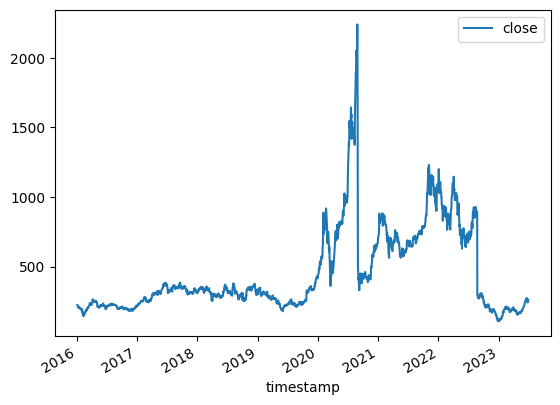

In [4]:
data.plot.line(y="close", use_index=True)

In [5]:
data = data.drop("symbol", axis=1)

In [6]:
split_prc = 0.5
train_data = data.iloc[:int(len(data)*split_prc)]
test_data =  data.iloc[int(len(data)*split_prc):]
print(len(data), len(train_data), len(test_data))
assert len(data) == len(train_data) + len(test_data)

1886 943 943


In [7]:

from numpy import ndarray
from pandas import DataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
from typing import List

from cira.strategy import Strategy
from cira.strategy.strategy import Randomness
from cira.strategy.backtest import back_test

class MyStrat(Strategy):
    def __init__(self, initial_capital=10_000, nr_random_walks=4, min_alocation=-10, max_alocation=10) -> None:
        super().__init__(name="MyStrat")
        self.model = LinearRegression()
        self.nr_random_walks = nr_random_walks
        self.initial_capital = initial_capital
        self.min_alocation = min_alocation
        self.max_alocation = max_alocation


    def fit(self, train_data) -> None:
        price = pd.DataFrame()
        price["price"] = train_data["close"]

        # random walk  
        best_allocation = []
        best_result = 0
        for _i in range(self.nr_random_walks):
            r_model = Randomness(self.min_alocation, self.max_alocation, seed=_i + 999)
            res = back_test(r_model, price, price , self.initial_capital, True)
            
            end_result = res.values[-1]
            if end_result - self.initial_capital > best_result:
               best_allocation = r_model.allocation
         
        assert best_allocation != [], "Warning walk did not yield positive return"
        for i in range(len(best_allocation)):
            best_allocation[i] = best_allocation[i][0]
        pd.DataFrame({"Alloc":best_allocation}).plot()
        
        # train model on best preforming random walk 
        y_train = np.array(best_allocation)
        self.model.fit(train_data, y_train)


    def predict(self, feature_data: DataFrame, prices: DataFrame, cash: float) -> ndarray:
        p = self.model.predict(feature_data)
        print(p)
        p = np.array([int(p[-1])])
        print(p)
        return p 



[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[8]
[8.57135769]
[

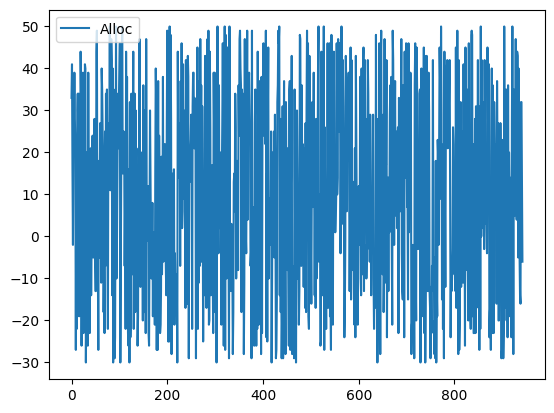

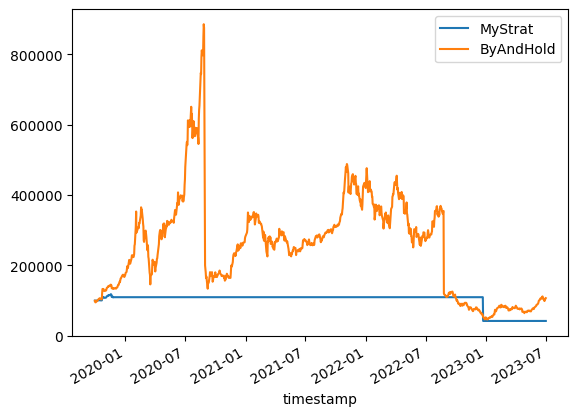

In [8]:
from cira.strategy.backtest import back_test_against_buy_and_hold

for _ in range(1):
    strat = MyStrat(nr_random_walks=5,min_alocation=-30,max_alocation=50)
    strat.fit(train_data)

    price = pd.DataFrame()
    price["price"] = test_data["close"]
    back_test_against_buy_and_hold(strat, test_data, price, 100_000, True).plot()